<a href="https://colab.research.google.com/github/aka-gera/Data_Classification/blob/main/breast_cancer_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BREAST CANCER PREDICTION**

---


We will use classification algorithms to predict the diagnosis of breast cancer (malignant or benign) based on the various features provided in the dataset


---

This dataset is sourced from: https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset

---

The algorithms demonstrate an average accuracy level of up to 86%.

---

The most influential features contributing to the prediction are:

1. Standard error for concave points
2. 'Worst' or largest standard deviation of gray-scale
3. 'Worst' or largest symmetry

These features significantly impact the classification process, contributing to the model's predictive accuracy.


##Dataset Description


Here is a brief description of the dataset.


| Column                   | Description                                                                                                           |
|--------------------------|-----------------------------------------------------------------------------------------------------------------------|
| id                       | Unique identifier for each entry in the dataset.                                                                      |
| diagnosis                | The diagnosis of breast cancer, with values 'M' indicating malignant (cancerous) and 'B' indicating benign (non-cancerous).|
| radius_mean              | Mean radius of the tumor.                                                                                             |
| texture_mean             | Mean texture (standard deviation of gray-scale values) of the tumor.                                                  |
| perimeter_mean           | Mean perimeter of the tumor.                                                                                          |
| area_mean                | Mean area of the tumor.                                                                                               |
| smoothness_mean          | Mean smoothness (local variation in radius lengths) of the tumor.                                                     |
| compactness_mean         | Mean compactness (perimeter^2 / area - 1.0) of the tumor.                                                             |
| concavity_mean           | Mean concavity (severity of concave portions of the contour) of the tumor.                                            |
| concave points_mean      | Mean number of concave portions of the contour of the tumor.                                                           |
| symmetry_mean            | Mean symmetry of the tumor.                                                                                           |
| fractal_dimension_mean   | Mean fractal dimension ("coastline approximation" - 1) of the tumor.                                                   |
| radius_se                | Standard error of the mean radius of the tumor.                                                                       |
| texture_se               | Standard error of the mean texture of the tumor.                                                                      |
| perimeter_se             | Standard error of the mean perimeter of the tumor.                                                                    |
| area_se                  | Standard error of the mean area of the tumor.                                                                         |
| smoothness_se            | Standard error of the mean smoothness of the tumor.                                                                    |
| compactness_se           | Standard error of the mean compactness of the tumor.                                                                   |
| concavity_se             | Standard error of the mean concavity of the tumor.                                                                    |
| concave points_se        | Standard error of the mean number of concave portions of the contour of the tumor.                                     |
| symmetry_se              | Standard error of the mean symmetry of the tumor.                                                                     |
| fractal_dimension_se     | Standard error of the mean fractal dimension of the tumor.                                                             |
| radius_worst             | Worst (largest) radius of the tumor.                                                                                  |
| texture_worst            | Worst (highest) texture (standard deviation of gray-scale values) of the tumor.                                        |
| perimeter_worst          | Worst (largest) perimeter of the tumor.                                                                               |
| area_worst               | Worst (largest) area of the tumor.                                                                                    |
| smoothness_worst         | Worst (largest) smoothness of the tumor.                                                                              |
| compactness_worst        | Worst (largest) compactness of the tumor.                                                                             |
| concavity_worst          | Worst (largest) concavity of the tumor.                                                                               |
| concave points_worst     | Worst (largest) number of concave portions of the contour of the tumor.                                                |
| symmetry_worst           | Worst (largest) symmetry of the tumor.                                                                                |
| fractal_dimension_worst  | Worst (largest) fractal dimension of the tumor.                                                                        |


# Preset Parameters

In [1]:
data_dir =  f'yasserh/breast-cancer-dataset'  # Dataset location

view_hist_feat = [0, 1, 2, -2, -1]  # Features selected for histogram visualization

target_switcher = 1  # Switch target to a feature which is in the last column

feat = [0]  # Features to drop

data_nan = 'mode'  # Fill NaN values:
                   #   Choose 'mode' to fill NaN values with the mode of the feature
                   #   Choose 'mean' to fill NaN values with the mean of the feature
                   #   Choose 'drop' to drop rows containing NaN values

balanced_dataset = False  # Whether to balance the dataset or not

confidence_interval_limit = [-3, 3]  # Define the limits of the confidence interval [-m, m] and eliminate the outliers

correlation_percentage_threshold = 0.7  # Set the correlation threshold between features for removal

pre_proc = 'X'  # Data preprocessing:
                #   Choose 'XY' to standardize both 'X' and 'Y',
                #   Choose 'X' to standardize only 'X',
                #   Choose 'Y' to standardize only 'Y',

target_values_label = True  # True if target values are float or integers

####### Neural Network Parameters #######
activation = 'relu'
epoch = 10
num_nodes = [2, 4]
dropout_prob = [0.05, 0.1]
lr = [0.01, 0.1]
batch_size = [2, 4]


# Import Dataset

In [2]:
! pip install kaggle

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!pwd
%cd /content

/content
/content


In [5]:
! mkdir ~/.kaggle

In [6]:
! cp /content/drive/MyDrive/Kaggle_API/kaggle.json ~/.kaggle

In [7]:
! chmod 600 ~/.kaggle/kaggle.json

In [8]:
! kaggle datasets download {data_dir}

Dataset URL: https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset
License(s): CC0-1.0
  0% 0.00/48.6k [00:00<?, ?B/s]
100% 48.6k/48.6k [00:00<00:00, 49.4MB/s]


In [9]:
import os
file_names = os.listdir()
zip_file =   [file for file in file_names if file.endswith('.zip')]
zip_file

['breast-cancer-dataset.zip']

In [10]:
import zipfile

# Open the zip file
with zipfile.ZipFile(zip_file[-1], 'r') as zip_ref:
    zip_ref.extractall()
    unzipped_file_names = zip_ref.namelist()
unzipped_file_names

['breast-cancer.csv']

# Import the helper classes

In [11]:
!pwd
%cd /content/drive/MyDrive/ML2023/data-analysis

/content
/content/drive/MyDrive/ML2023/data-analysis


In [12]:
!pip install AutoLogging-ML
!pip install xgboost
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 6.4 MB/s eta 0:00:00


In [13]:
! pip install shap
import shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 6.7 MB/s eta 0:00:00


In [14]:
from plotly.subplots import make_subplots
from AutoLogging_ML import AutoLogger
import seaborn as sns

from aka_data_analysis.aka_plot import aka_plot, aka_correlation_analysis
from aka_data_analysis.aka_learning import aka_learn,aka_clean,aka_filter

aka_plot = aka_plot()
aka_corr_an = aka_correlation_analysis()
aka_clean = aka_clean()
aka_learn = aka_learn()
aka_filter = aka_filter()
aka_corr_an = aka_correlation_analysis()

In [15]:
from aka_data_analysis.aka_nn import aka_nn

In [16]:
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import plotly.figure_factory as ff
import plotly.express as px
import numpy as np
import pandas as pd


# Dataset Information

In [17]:
df = aka_clean.df_get(f'/content/{unzipped_file_names[0]}')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [18]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [19]:
# view_hist_feat = [0,1,2,-2,-1]
fig = aka_plot.Plot_histogram_Features(df,view_hist_feat )
if fig is not None:
    fig.show()

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [21]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# Null Values

In [22]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [23]:
aka_plot.plot_missing_values(df)

# Clean Dataset

## Drop Duplicate data

In [24]:
df.drop_duplicates()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## Swap the target and the last feature

In [25]:
# target_switcher = -1
df = aka_clean.swap_features(df,target_switcher)
df.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


### Drop feature(s)


In [26]:
# feat =  []
df = aka_clean.drop_feature(df,feat)
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


##  Convert categorical variables into numerical representations

In [27]:
# data_nan = 'drop'  # Choose 'mode' to fill NaN values with the mode of the feature
#                    # Choose 'mean' to fill NaN values with the mean of the feature
#                    # Choose 'drop' to drop rows containing NaN values

mapping,swapMapping = aka_clean.CleaningVar(df)
df = aka_clean.CleaningDF(df,mapping,data_nan)

## Balance Dataset

In [28]:
aka_plot.plot_pie(df,-1)

In [29]:
# balanced_dataset = False

if balanced_dataset:
  df = aka_clean.balance_df(df,'j')
  aka_plot.plot_pie(df, -1)

## Correlation Matrix

In [30]:
aka_corr_an.Plot_Correlation_Matrix(df)

In [31]:

# confidence_interval_limit =   [-3,3]             # Define the limits m of the confidence interval [-m, m] and eliminate the outliers'''

# correlation_percentage_threshold = .7      # Set the limit of the correlation between the feature to be removed

df_filtered,corr_tmp = aka_learn.filter_drop_corr_df(df,confidence_interval_limit,correlation_percentage_threshold)

print(f'We dropped {df.shape[0]-df_filtered.shape[0]} outliers and remove {df.shape[1]-df_filtered.shape[1]} feature(s)')
print(f'The filtered dataset\'s shape is {df_filtered.shape} ')

We dropped 74 outliers and remove 20 feature(s)
The filtered dataset's shape is (495, 11) 


## Graph the features that are highly correlated


In [32]:
fig = aka_corr_an.Plot_Correlate_Features(df,list(corr_tmp))
if fig is not None:
    fig.show()

### Visualize the distribution of the filtered dataset

In [33]:
aka_plot.Plot_box_Features(df,df_filtered,corr_tmp=range(df_filtered.shape[1]))

# Search for the most effective ML algorithm to learn the dataset

In [34]:
# pre_proc = 'X'                                # Choose between 'XY' to standardize both 'X' and 'Y',
#                                               #                'X' to standardize only 'X',
#                                               #                'Y' to standardize only 'Y',

X_train, X_test, y_train, y_test = aka_learn.Learning_data(df_filtered,pre_proc)

In [35]:
r,model =AutoLogger.train_and_log_classification(X_train,y_train,X_test,y_test,size='large')
y_pred = model.predict(X_test)

In [36]:
model

LinearDiscriminantAnalysis()

<Axes: xlabel='validation-accuracy', ylabel='model'>

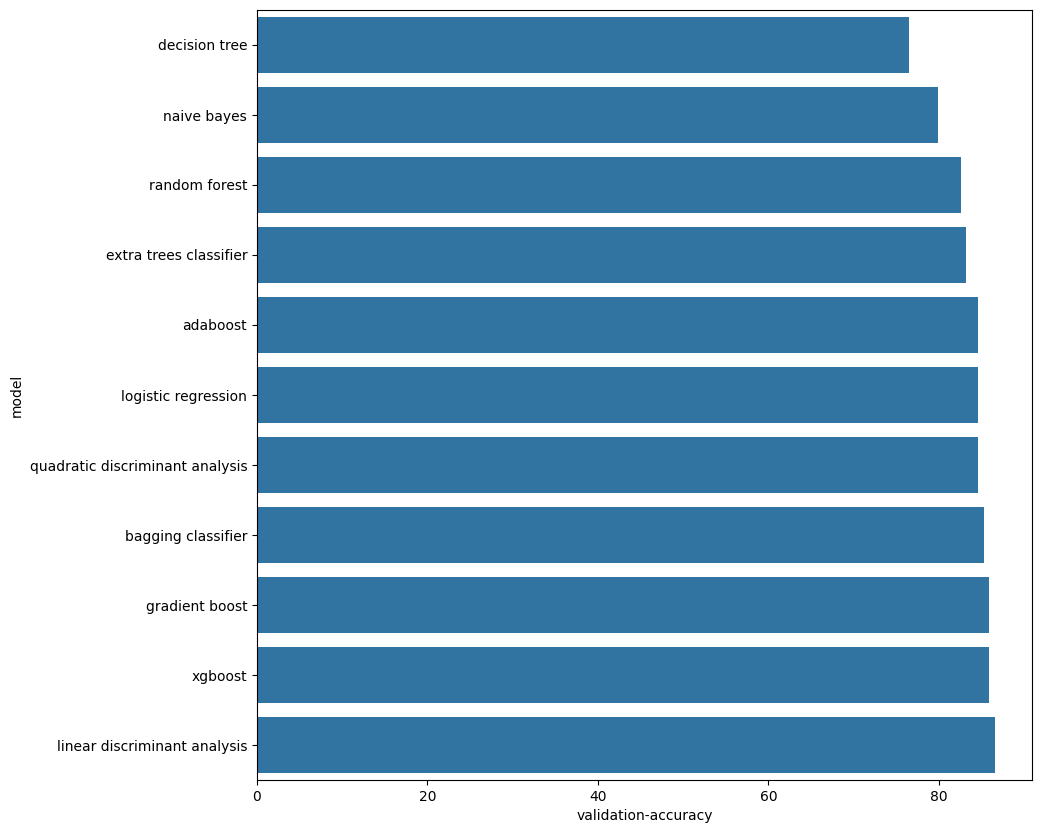

In [37]:
AutoLogger.get_metric_plot_classification(r,'validation','accuracy')


## Confusion Matrix

In [38]:
# target_values_label = True

y_pred_ = aka_clean.swap_map(y_pred,swapMapping)
y_test_ = aka_clean.swap_map(y_test,swapMapping)

if target_values_label:
  Label = [str(un) for un in np.unique(pd.concat([y_pred_, y_test_]))]
else:
  Label = ['v_'+str(un) for un in np.unique(pd.concat([y_pred_, y_test_]))]

In [39]:
fig2 =  aka_plot.plot_confusion_matrix(y_test_,y_pred_,Label)
fig2.show()

## Classification Report

In [40]:
fig3 =  aka_plot.plot_classification_report(y_test_,y_pred_,Label)
fig3.show()

## Plot Important Features by Weight



In [41]:
# aka_plot.plot_important_features(model,df_filtered)

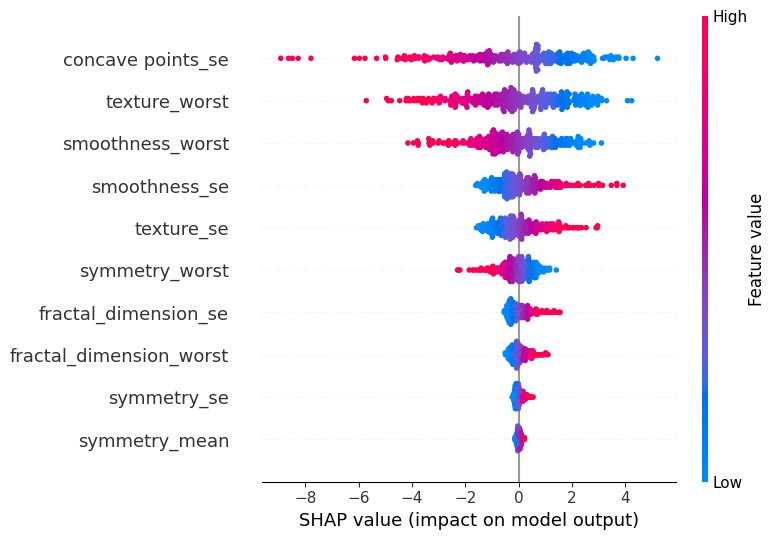

In [42]:
feat_names = df_filtered.columns[:-1]
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_train)
shap.summary_plot(shap_values, X_train, feature_names=feat_names)

# Neural Net

In [43]:

myNN = aka_nn(X_train, X_test, y_train, y_test,activation)
model,scre =myNN.DNN(epoch,num_nodes,dropout_prob,lr,batch_size)
y_pred = myNN.predict(model)

2 nodes, dropout 0.05, lr 0.01, batch size 2
5/5 [==============================] - 0s 3ms/step - loss: 0.2366 - accuracy: 0.6242
2 nodes, dropout 0.05, lr 0.01, batch size 4
5/5 [==============================] - 0s 3ms/step - loss: 0.1505 - accuracy: 0.8121
2 nodes, dropout 0.05, lr 0.1, batch size 2
5/5 [==============================] - 0s 4ms/step - loss: 0.1734 - accuracy: 0.7785
2 nodes, dropout 0.05, lr 0.1, batch size 4
5/5 [==============================] - 0s 3ms/step - loss: 0.1222 - accuracy: 0.8591
2 nodes, dropout 0.1, lr 0.01, batch size 2
5/5 [==============================] - 0s 3ms/step - loss: 0.1099 - accuracy: 0.8322
2 nodes, dropout 0.1, lr 0.01, batch size 4
5/5 [==============================] - 0s 4ms/step - loss: 0.1828 - accuracy: 0.7584
2 nodes, dropout 0.1, lr 0.1, batch size 2
5/5 [==============================] - 0s 3ms/step - loss: 0.2700 - accuracy: 0.3758
2 nodes, dropout 0.1, lr 0.1, batch size 4
5/5 [==============================] - 0s 3ms/step - 

## Confusion Matrix

In [44]:
y_pred_ = aka_clean.swap_map(y_pred,swapMapping)
y_test_ = aka_clean.swap_map(y_test,swapMapping)
# Label = [str(un) for un in np.unique(pd.concat([y_pred_, y_test_]))]

In [45]:
fig2 =  aka_plot.plot_confusion_matrix(y_test_,y_pred_,Label)
fig2.show()

## Classification Report

In [46]:
fig3 =  aka_plot.plot_classification_report(y_test_,y_pred_,Label)
fig3.show()

## Plot Important Features by Weight


ExactExplainer explainer: 347it [00:19, 14.03it/s]                         


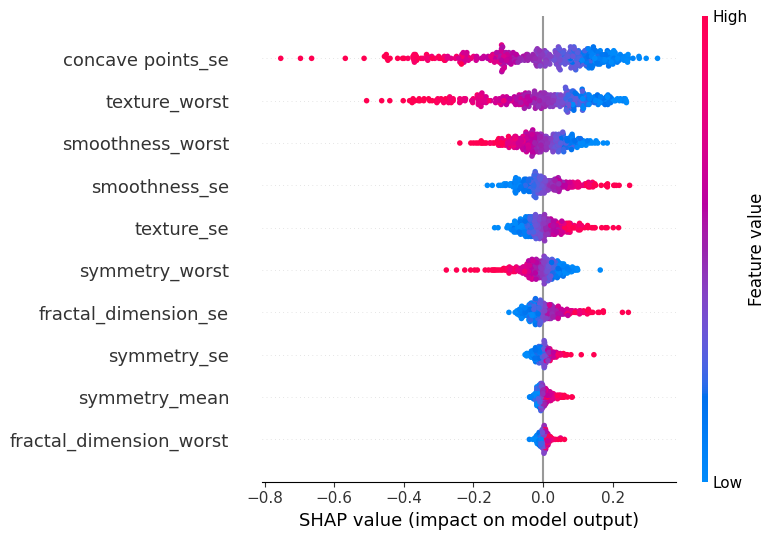

In [47]:
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_train)
shap.summary_plot(shap_values, X_train, feature_names=feat_names)